In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.nunique()

,0
price,219
area,284
bedrooms,6
bathrooms,4
stories,4
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2


**Missing Values Check**

In [7]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


**Duplicated Values Check**

In [8]:
df.loc[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [9]:
df["mainroad"] = df["mainroad"].astype("category")
df["mainroad"] = df["mainroad"].cat.codes

df["guestroom"] = df["guestroom"].astype("category")
df["guestroom"] = df["guestroom"].cat.codes

df["basement"] = df["basement"].astype("category")
df["basement"] = df["basement"].cat.codes

df["hotwaterheating"] = df["hotwaterheating"].astype("category")
df["hotwaterheating"] = df["hotwaterheating"].cat.codes

df["airconditioning"] = df["airconditioning"].astype("category")
df["airconditioning"] = df["airconditioning"].cat.codes

df["prefarea"] = df["prefarea"].astype("category")
df["prefarea"] = df["prefarea"].cat.codes

df["furnishingstatus"] = df["furnishingstatus"].astype("category")
df["furnishingstatus"] = df["furnishingstatus"].cat.codes

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int8 
 6   guestroom         545 non-null    int8 
 7   basement          545 non-null    int8 
 8   hotwaterheating   545 non-null    int8 
 9   airconditioning   545 non-null    int8 
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int8 
 12  furnishingstatus  545 non-null    int8 
dtypes: int64(6), int8(7)
memory usage: 29.4 KB


In [11]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


In [12]:
df.cov()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,3.498544e+12,2.175676e+09,505946.425931,486409.333378,682644.632825,193607.540576,182974.748111,167084.951632,36453.619131,394111.230505,619467.324204,261721.518922,-433954.322450
area,2.175676e+09,4.709512e+06,243.232140,211.346617,158.129368,218.558233,116.563411,49.140836,-4.193993,224.507167,659.989696,216.183301,-283.276781
bedrooms,5.059464e+05,2.432321e+02,0.544738,0.138674,0.261589,-0.003096,0.022760,0.034299,0.007117,0.055140,0.088562,0.024747,-0.069256
bathrooms,4.864093e+05,2.113466e+02,0.138674,0.252476,0.142171,0.007427,0.024329,0.024501,0.007066,0.043689,0.076842,0.013532,-0.054921
stories,6.826446e+05,1.581294e+02,0.261589,0.142171,0.752543,0.036809,0.014460,-0.071418,0.003424,0.118480,0.034043,0.016352,-0.069135
mainroad,1.936075e+05,2.185582e+02,-0.003096,0.007427,0.036809,0.121546,0.012325,0.007326,-0.000860,0.017097,0.061407,0.029567,-0.041601
guestroom,1.829747e+05,1.165634e+02,0.022760,0.024329,0.014460,0.012325,0.146573,0.068025,-0.000826,0.024609,0.012358,0.026137,-0.034491
basement,1.670850e+05,4.914084e+01,0.034299,0.024501,-0.071418,0.007326,0.068025,0.228056,0.000438,0.010517,0.021189,0.046216,-0.041025
hotwaterheating,3.645362e+04,-4.193993e+00,0.007117,0.007066,0.003424,-0.000860,-0.000826,0.000438,0.043848,-0.012665,0.012244,-0.005279,-0.005042
airconditioning,3.941112e+05,2.245072e+02,0.055140,0.043689,0.118480,0.017097,0.024609,0.010517,-0.012665,0.216392,0.063795,0.023169,-0.053295


**Data Visulization**

<Axes: >

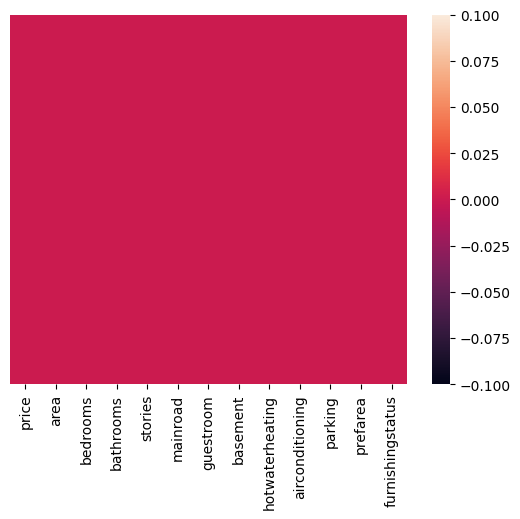

In [13]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= True)

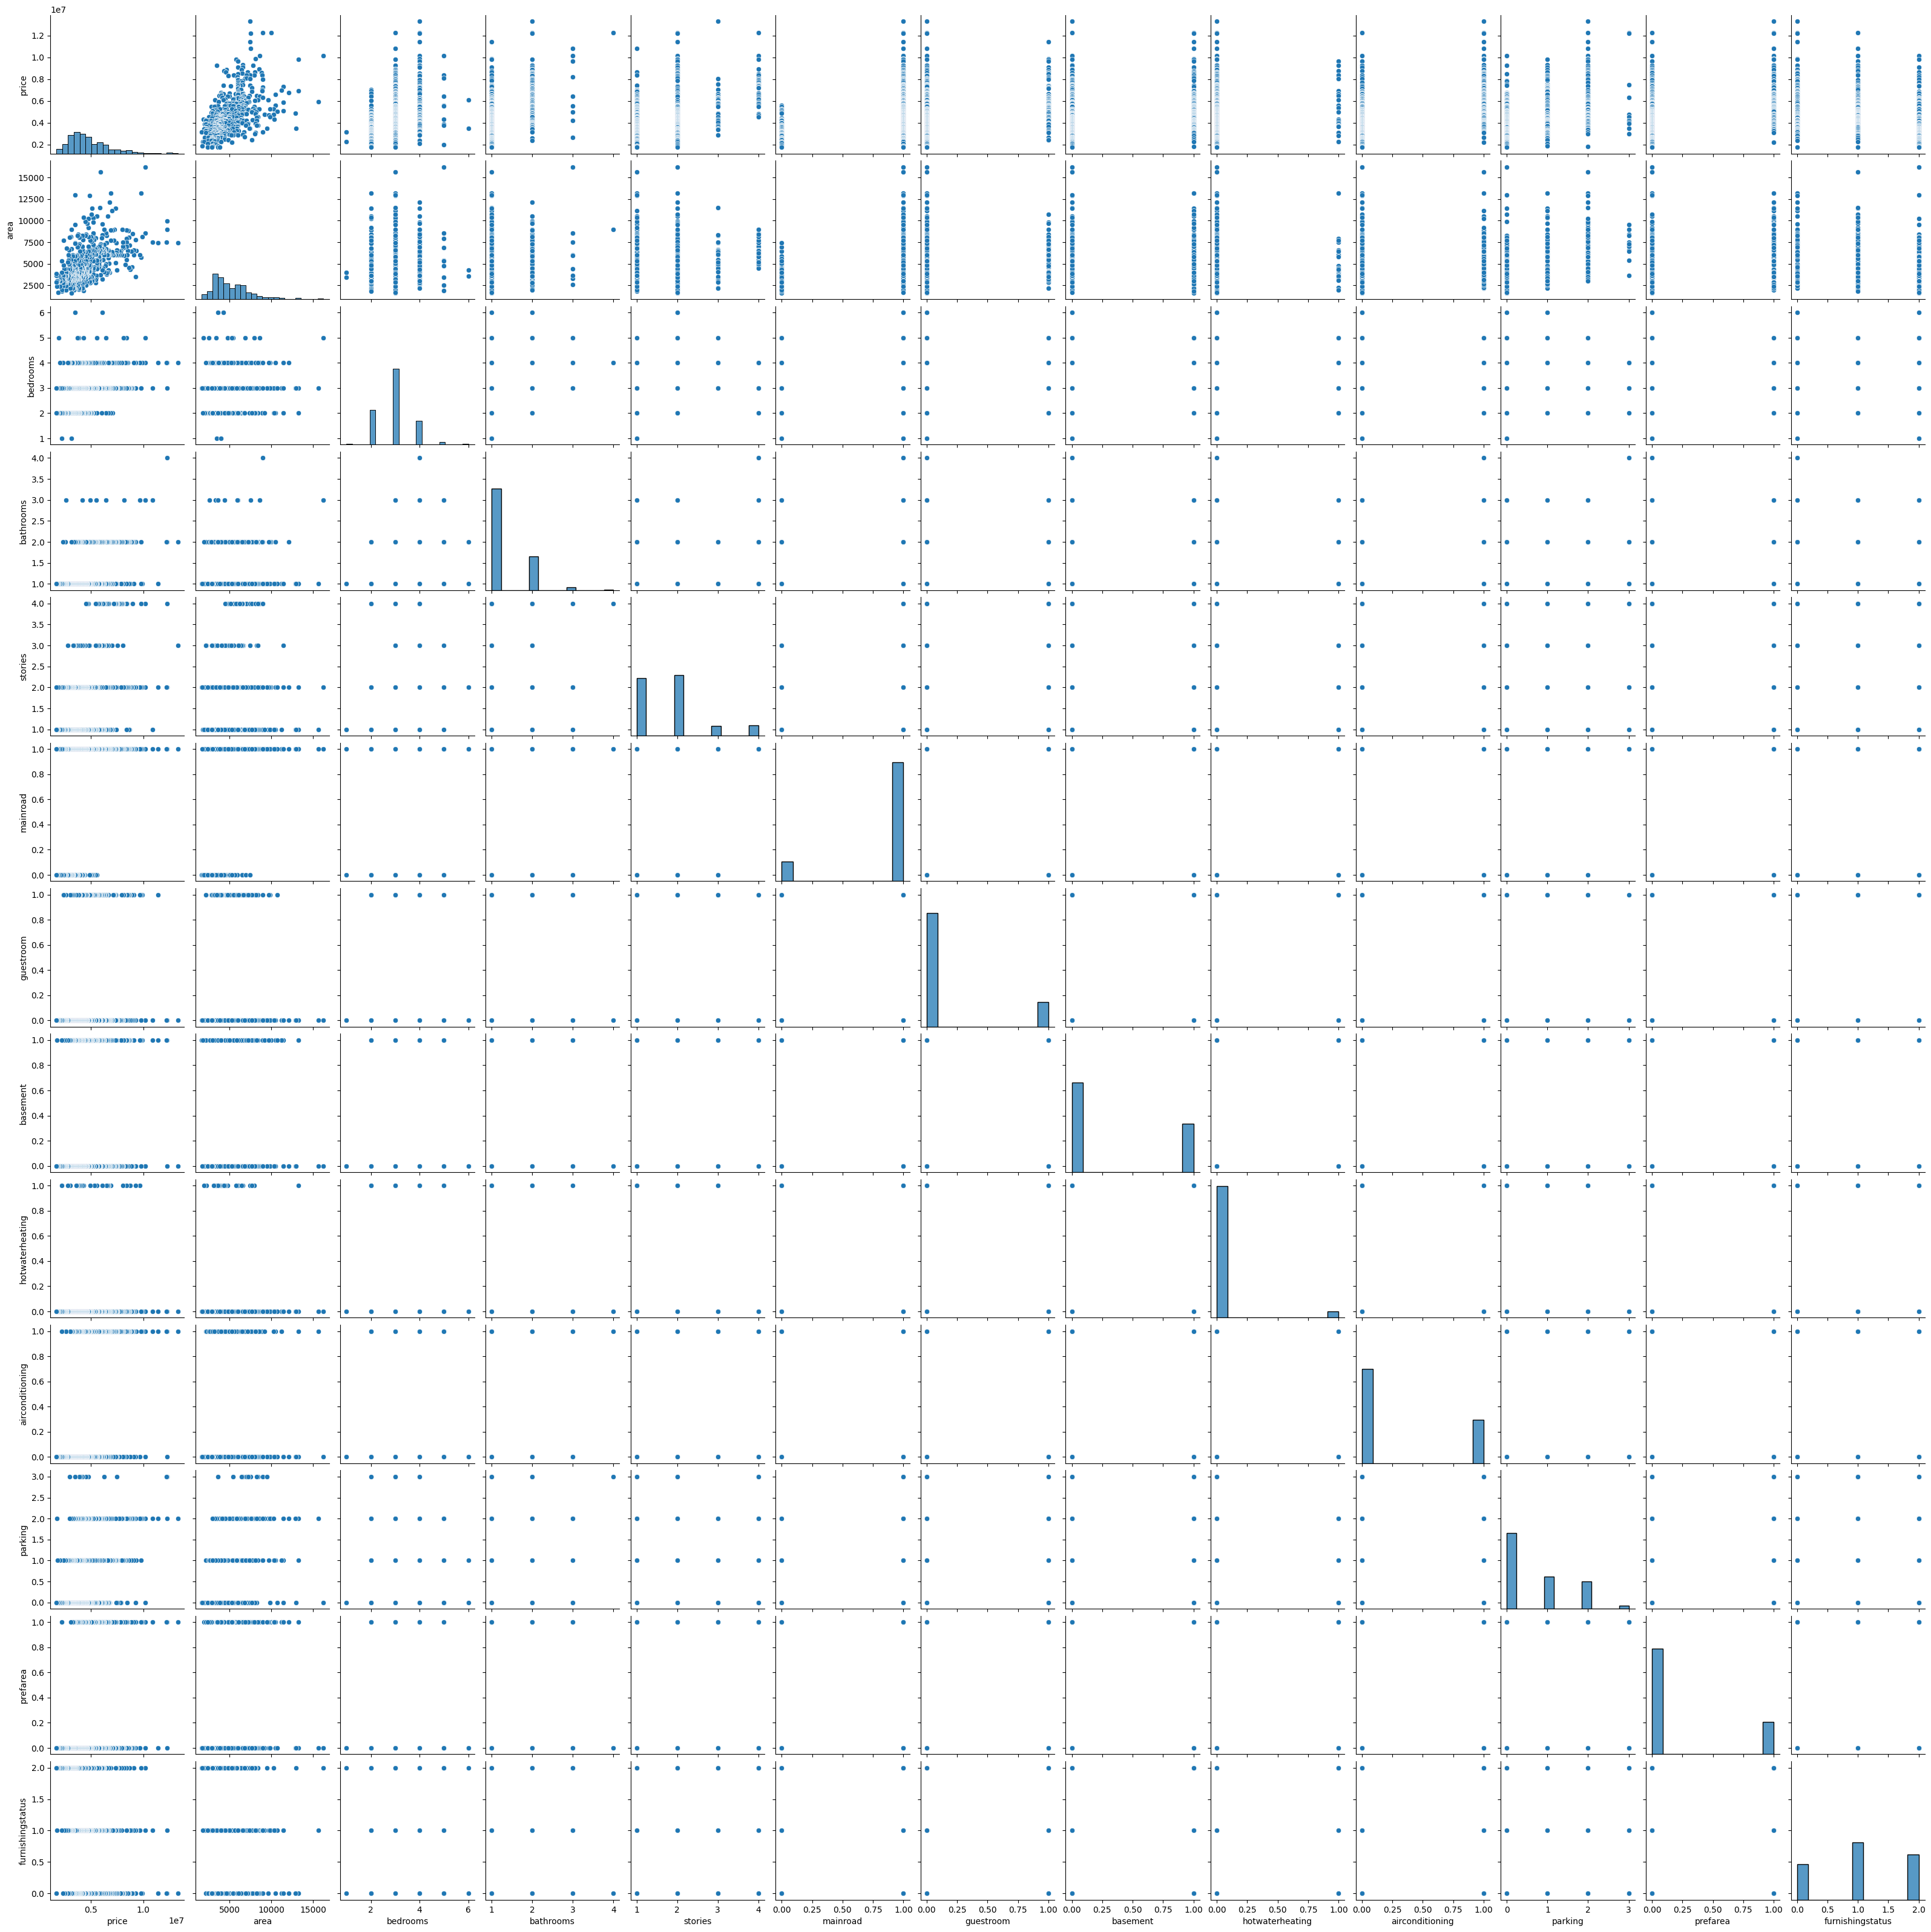

In [14]:
sns.pairplot(df)

In [15]:
df["bedrooms"].value_counts()

,count
bedrooms,
3,300
2,136
4,95
5,10
6,2
1,2


<Axes: xlabel='bedrooms', ylabel='count'>

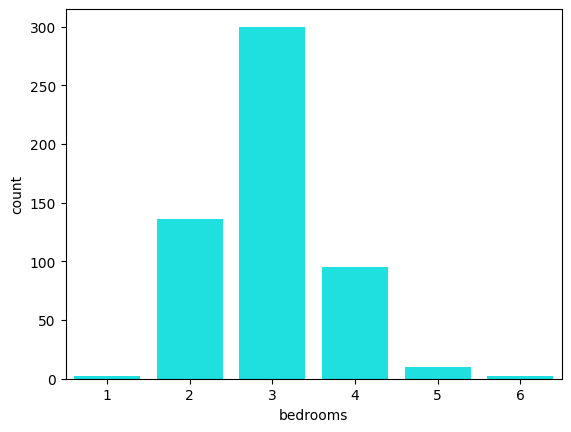

In [16]:
sns.countplot(data= df,
              x= df["bedrooms"],
              color= "cyan")

In [17]:
df["bathrooms"].value_counts()

,count
bathrooms,
1,401
2,133
3,10
4,1


<Axes: xlabel='bathrooms', ylabel='count'>

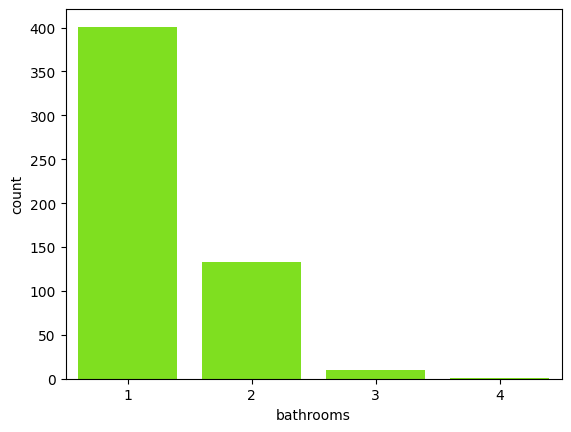

In [18]:
sns.countplot(data= df,
              x= df["bathrooms"],
              color= "chartreuse")

In [19]:
df["parking"].value_counts()

,count
parking,
0,299
1,126
2,108
3,12


<Axes: xlabel='parking', ylabel='count'>

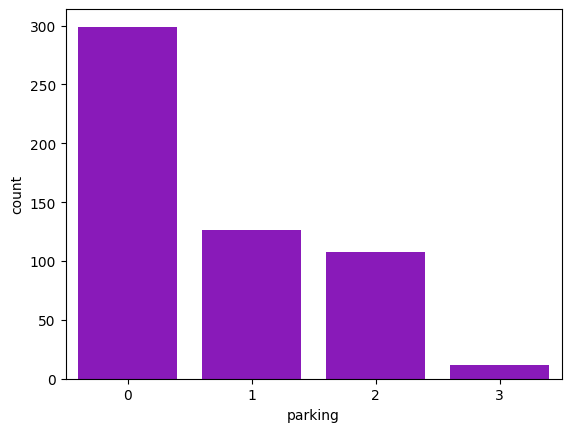

In [20]:
sns.countplot(data= df,
              x= df["parking"],
              color= "darkviolet")

In [21]:
df["mainroad"].value_counts()

,count
mainroad,
1,468
0,77


In [22]:
df["stories"].value_counts()

,count
stories,
2,238
1,227
4,41
3,39


In [23]:
df["guestroom"].value_counts()

,count
guestroom,
0,448
1,97


In [24]:
df["basement"].value_counts()

,count
basement,
0,354
1,191


In [25]:
df["basement"].value_counts()

,count
basement,
0,354
1,191


In [26]:
df["hotwaterheating"].value_counts()

,count
hotwaterheating,
0,520
1,25


In [27]:
df["airconditioning"].value_counts()

,count
airconditioning,
0,373
1,172


In [28]:
df["prefarea"].value_counts()

,count
prefarea,
0,417
1,128


In [29]:
df["furnishingstatus"].value_counts()

,count
furnishingstatus,
1,227
2,178
0,140


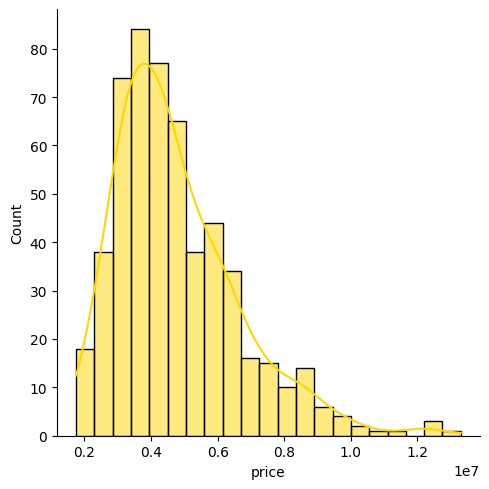

In [30]:
sns.displot(df["price"],
            kde= True,
            color= "gold")

<Axes: xlabel='area', ylabel='price'>

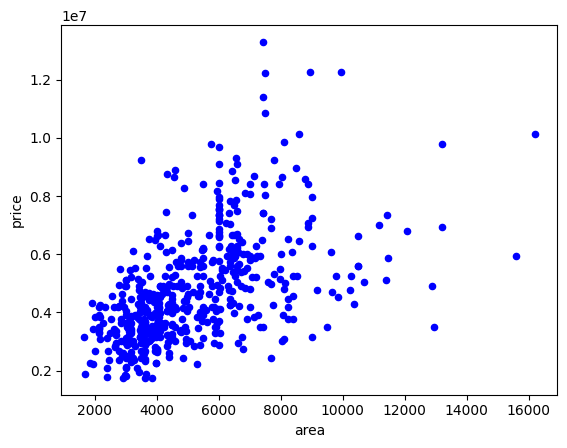

In [31]:
df.plot("area", "price",
        kind= "scatter",
        color= "b")

[Text(0.5, 0, 'furnishingstatus'),
 Text(0, 0.5, 'Frequency of furnishingstatus')]

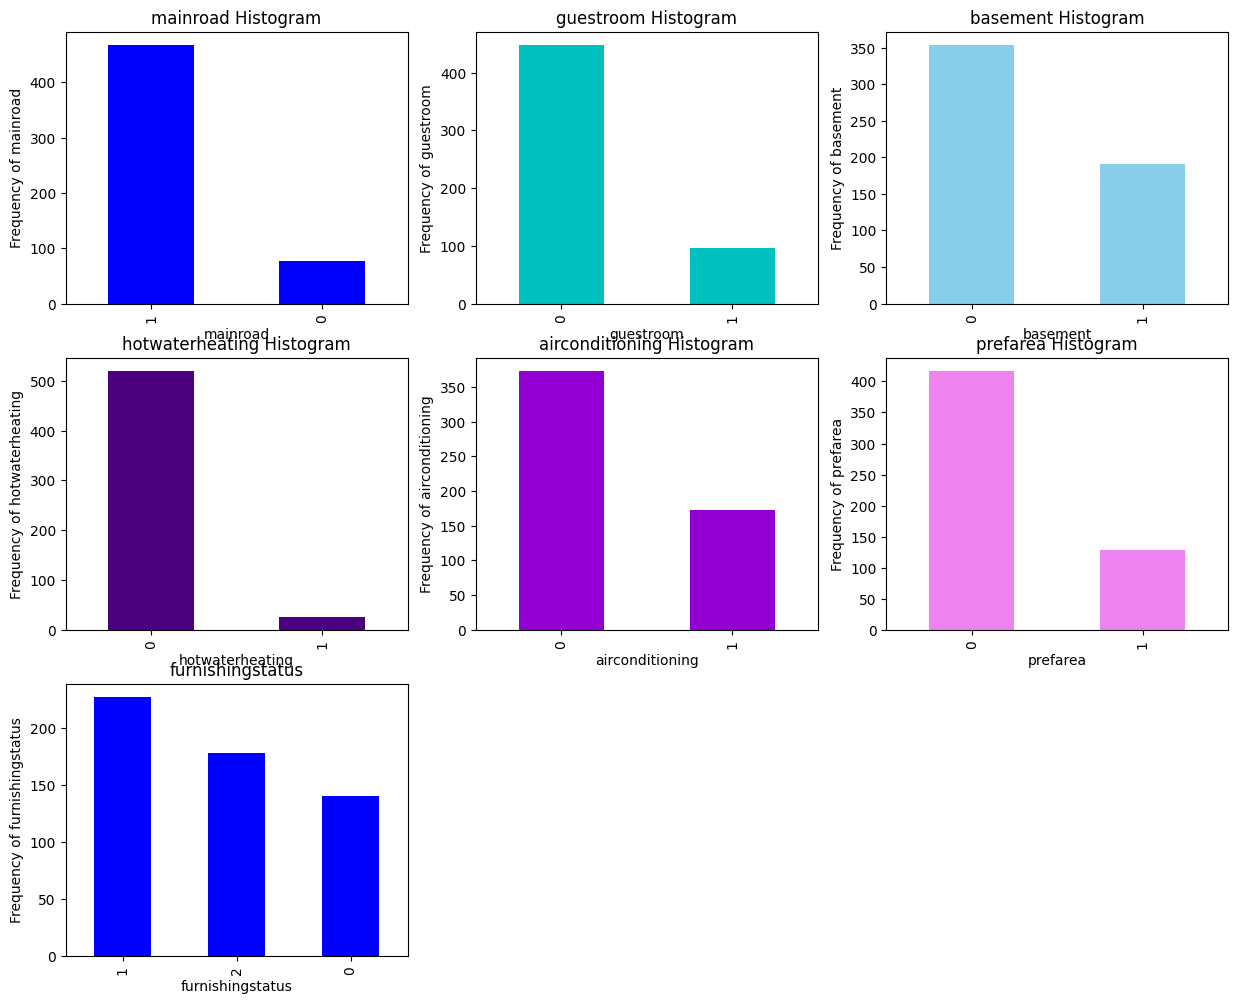

In [32]:
plt.figure(figsize= (15, 12))

plt.subplot(3, 3, 1)
plt_1 = df["mainroad"].value_counts().plot(kind= "bar", color= "b")
plt.title("mainroad Histogram")
plt_1.set(xlabel= "mainroad", ylabel= "Frequency of mainroad")

plt.subplot(3, 3, 2)
plt_2 = df["guestroom"].value_counts().plot(kind= "bar", color= "c")
plt.title("guestroom Histogram")
plt_2.set(xlabel= "guestroom", ylabel= "Frequency of guestroom")

plt.subplot(3, 3, 3)
plt_3 = df["basement"].value_counts().plot(kind= "bar", color= "skyblue")
plt.title("basement Histogram")
plt_3.set(xlabel= "basement", ylabel= "Frequency of basement")

plt.subplot(3, 3, 4)
plt_4 = df["hotwaterheating"].value_counts().plot(kind= "bar", color= "indigo")
plt.title("hotwaterheating Histogram")
plt_4.set(xlabel= "hotwaterheating", ylabel= "Frequency of hotwaterheating")

plt.subplot(3, 3, 5)
plt_5 = df["airconditioning"].value_counts().plot(kind= "bar", color= "darkviolet")
plt.title("airconditioning Histogram")
plt_5.set(xlabel= "airconditioning", ylabel= "Frequency of airconditioning")

plt.subplot(3, 3, 6)
plt_6 = df["prefarea"].value_counts().plot(kind= "bar", color= "violet")
plt.title("prefarea Histogram")
plt_6.set(xlabel= "prefarea", ylabel= "Frequency of prefarea")

plt.subplot(3, 3, 7)
plt_7 = df["furnishingstatus"].value_counts().plot(kind= "bar",color= "b")
plt.title("furnishingstatus")
plt_7.set(xlabel = "furnishingstatus", ylabel= "Frequency of furnishingstatus")

Text(0.5, 1.0, 'furnishingstatus')

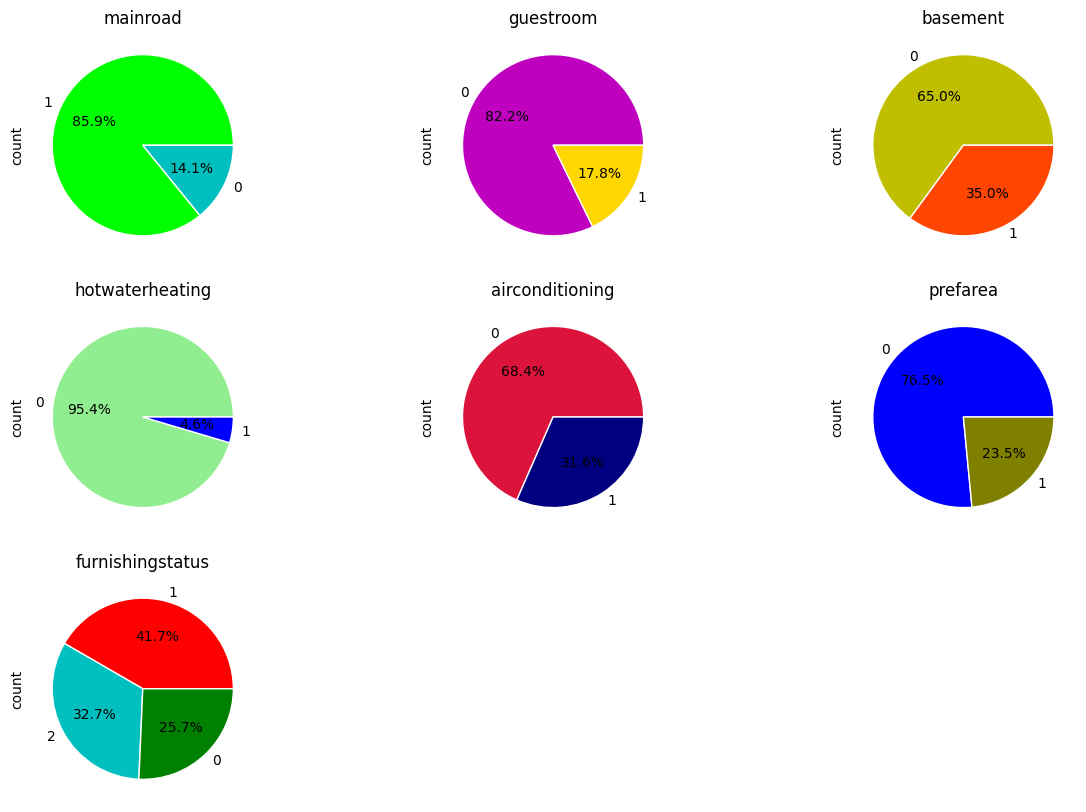

In [33]:
plt.figure(figsize= (15, 10))

plt.subplot(3, 3, 1)
plt_1 = df["mainroad"].value_counts().plot(kind= "pie", autopct= "%1.1f%%", colors= ["lime", "c"], wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("mainroad")

plt.subplot(3, 3, 2)
plt_2 = df["guestroom"].value_counts().plot(kind= "pie", autopct= "%1.1f%%", colors= ["m", "gold"], wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("guestroom")

plt.subplot(3, 3, 3)
plt_3 = df["basement"].value_counts().plot(kind= "pie", autopct= "%1.1f%%", colors= ["y", "orangered"], wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("basement")

plt.subplot(3, 3, 4)
plt_4 = df["hotwaterheating"].value_counts().plot(kind= "pie", autopct= "%1.1f%%", colors= ["lightgreen", "b"], wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("hotwaterheating")

plt.subplot(3, 3, 5)
plt_5 = df["airconditioning"].value_counts().plot(kind= "pie", autopct= "%1.1f%%", colors= ["crimson", "navy"], wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("airconditioning")

plt.subplot(3, 3, 6)
plt_6 = df["prefarea"].value_counts().plot(kind= "pie", autopct= "%1.1f%%", colors= ["b", "olive"], wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("prefarea")

plt.subplot(3, 3, 7)
plt_7 = df["furnishingstatus"].value_counts().plot(kind= "pie", autopct= "%1.1f%%", colors= ["r", "c", "g"], wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("furnishingstatus")

**Train Test Split**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop("price", axis= 1)
y = df["price"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 75)

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Neural Network**

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [41]:
model = Sequential()

model.add(Dense(19, activation= "relu"))
model.add(Dense(19, activation= "relu"))
model.add(Dense(19, activation= "relu"))
model.add(Dense(19, activation= "relu"))

model.add(Dense(1))

model.compile(optimizer= "adam", loss= "mse")

In [42]:
model.fit(x= X_train, y= y_train,
          validation_data= (X_test, y_test),
          batch_size= 128,
          epochs= 500)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 25455616851968.0000 - val_loss: 27044230463488.0000
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 26461022978048.0000 - val_loss: 27044230463488.0000
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 25239585030144.0000 - val_loss: 27044230463488.0000
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 26941507764224.0000 - val_loss: 27044226269184.0000
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 26332280913920.0000 - val_loss: 27044226269184.0000
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 25358841675776.0000 - val_loss: 27044226269184.0000
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 25509272485888.0000 - val_loss: 27044224172032.0000
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 25881990922240.0000 - val_loss: 27044222074880.0000
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 26425769852928.0000 - val_loss: 27044219977728.0000
Epoch 10/5

In [43]:
losses = pd.DataFrame(model.history.history)

In [44]:
losses.head()

,loss,val_loss
0,2.585639e+13,2.704423e+13
1,2.585639e+13,2.704423e+13
2,2.585638e+13,2.704423e+13
3,2.585638e+13,2.704423e+13
4,2.585638e+13,2.704423e+13


<Axes: >

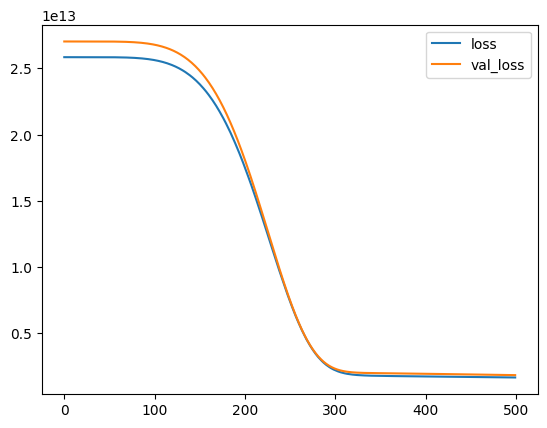

In [45]:
losses.plot()

In [46]:
predictions = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


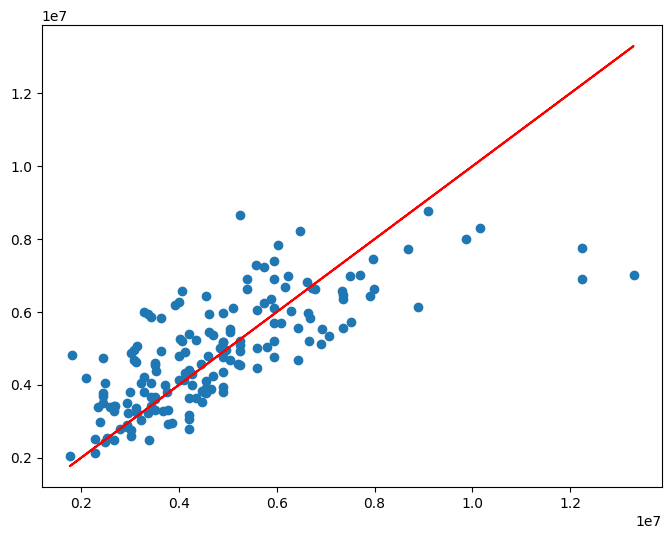

In [47]:
plt.figure(figsize= (8, 6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, "r")